# SUPPORT VECTOR MACHINE

Support Vector Machine(SVM) adalah algoritma yang berguna untuk klasifikasi biner. SVM membuat hyperplane dengan dimensi N-1 untuk memisahkan fitur data berjumlah N.



Anggap jika kita mempunyai data yang dapat dipisah dengan garis linear. Pada gambar dibawah ada berbagai cara untuk memisahkan kategori A dan kategori B. SVM berfungsi untuk menentukan garis hyperplane, yaitu garis yang mempunyai margin terbesar untuk kedua kategori. Margin adalah jarak terdekat garis hyperplane terhadap poin terdekat dalam kedua kategori, Dalam hal ini, SVM memilih garis A karena mempunyai margin yang lebih besar dari B

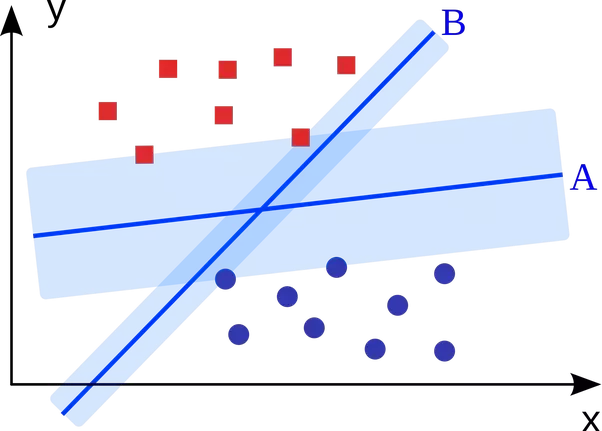

Garis hyperplane pada umumnya mempunyai persamaan sebagai berikut.

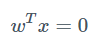

Dengan w dan x adalah vektor yang dihasilkan dari poin terdekat A dengan poin terdekat B. vektor w biasanya disebut dengan weight vector

Tujuan kita membuat garis hyperplane adalah untuk membuat nilai margin yang terbesar. Rumus margin pada umumnya adalah sebagai berikut.

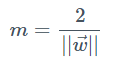

Dapat dilihat dari rumus diatas bahwa jika nilai vektor hyperplane(w) semakin kecil, maka nilai margin akan semakin besar. SVM berfokus dalam memaksimalkan margin agar bisa menghasilkan model yang optimal untuk mengklasifikasikan 2 kategori

Bagaimana jika kategori tidak dapat dipisah dengan fungsi linear? Jika kategori tidak dapat dipisah dengan fungsi linear, maka hyperplane akan ditentukan di dimensi yang lebih tinggi. Kemudian saat sudah ditentukan fungsi hyperplane, datapoints akan dikembalikan ke 2 dimensi bersama dengan fungsi hyperplanenya. Teknik ini yang dinamakan dengan Kernel Trick. Kernel Trick dibagi menjadi 2, yaitu Gaussian RBF, Polynomial, dan lain-lain. Gambar dibawah ini adalah Gaussian RBF.

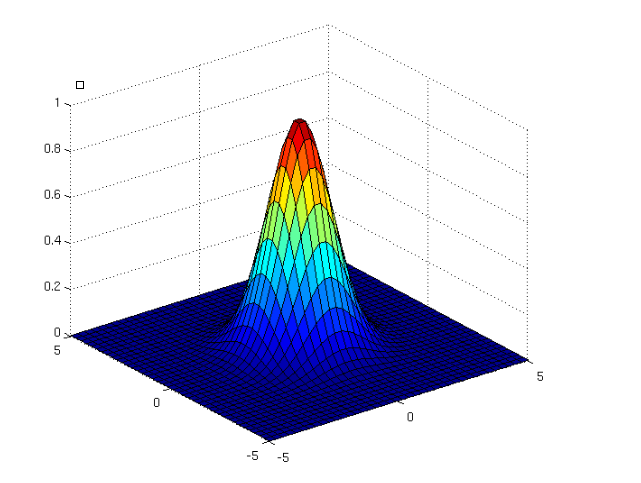

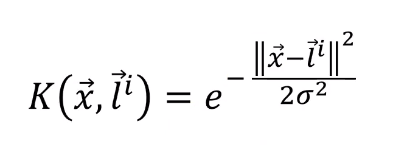

$x$ = data point<br>
$l$ = landmark<br>
$\sigma$ = parameter untuk mengatur hyperplane. $\sigma$ akan ditentukan oleh model SVM untuk mengklasifikasikan 2 kategori


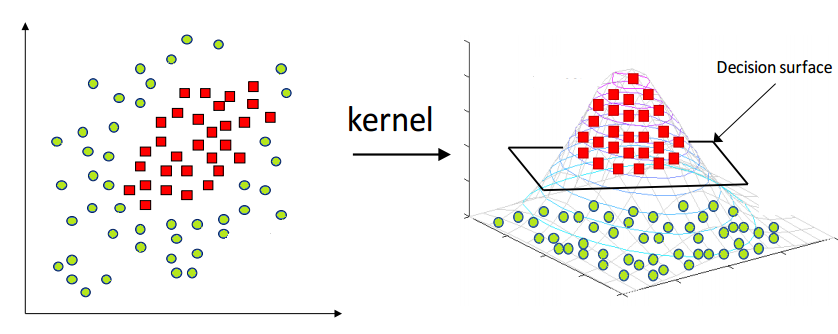

# CODING SECTION
 
# Use Case

Sebuah perusahaan mobil berinisial AVZ ingin mendongkrak penjualan mereka untuk tahun 2019. Sebagai Data Scientist, kita diberikan dataset laporan hasil iklan mobil yang berisi dengan fitur ID, umur, gaji, dan record pembelian. Diharapkan kita mampu memberikan insight untuk meningkatkan kemungkinan customer akan membeli mobil tersebut atau tidak.

In [10]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Importing dataset
df = pd.read_csv('data_iklan.csv')

In [12]:
df.head(10)

,ID,Gender,Umur,Gaji,Pembelian
0,15624510,Pria,19,9,0
1,15810944,Pria,35,10,0
2,15668575,Wanita,26,21,0
3,15603246,Wanita,27,28,0
4,15804002,Pria,19,38,0
5,15728773,Pria,27,29,0
6,15598044,Wanita,27,42,0
7,15694829,Wanita,32,75,1
8,15600575,Pria,25,16,0
9,15727311,Wanita,35,32,0


In [13]:
# memisahkan dataset ke training dan test data
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [16]:
accuracy_score(y_test, y_pred)

0.93

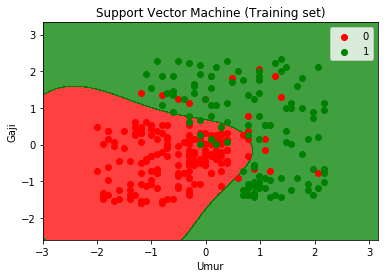

In [17]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()

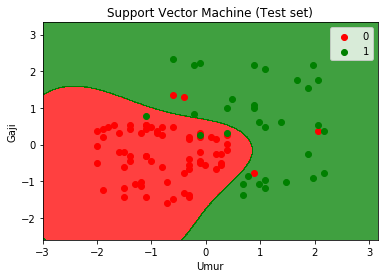

In [18]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()

# KESIMPULAN

SVM sangat berguna untuk mengatasi klasifikasi data yang bersifat non-linear. Selain itu, SVM dapat dimodelkan sesuai dengan domain knowledge yang kita punya, karena tidak bersifat blackbox. Namun, SVM sangat sulit dipakai untuk problem berskala besar. Hal ini dikarenakan jika kita mempunyai banyak fitur untuk dimodelkan dengan SVM, maka SVM harus menentukan dengan dimensi yang lebih tinggi pula sehingga akan memerlukan proses komputasi yang begitu lama.